# Demo 2 - Simulated Data

For this demo of my own l2 regularized logistic regression implemented in Python I use a simulated dataset created using scikit-learn's `make_classification` function. The dataset consists of 1000 samples with 10 features, which fall into 3 different classes ('0', '1', or '2').

In this notebook I demonstrate the capabilities of fast gradient descent and the one versus one multi-class classification strategy to classify the observations based on the predicting features. 

## Package Imports and Notebook Setup

In [1]:
# Import my logistic regression module
import src.logistic_regression as lr

# Import other required python packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Show all output from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_inateractivity = "all"

## Create and Standardize Simulated Data

Here I create a simulated dataset with scikit-learn's built in datasets module using the `make_classification` function. I chose 1000 samples with 10 features and 3 classes. This functions creates clusters of normally distributed points based on the features; it also includes interdependence between the features and adds noise to the data. More documentation on this function can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

After generating the data I split it into training and test sets using the default split (25% allocated to the test set). The model will be trained using the training set, with the test set withheld for evaluating performance. Finally, I standardize the predictor data, which ensures that predictors of different scales do not dominate the minimization process. Here the response data does not need to be standardized since it is categorical.

In [2]:
# Create simulated dataset
x, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1)

# # Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Standardize the predictor data
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Initial Implementatin & Check for Convergence

After creating and standardizing the data, I run the model on the full dataset. Since this model is only intended for binary classification and this dataset contains three classes, the output here is not interpretable yet. However, it is useful for ensuring that the model converges.

I initialize the model with a coefficient vector ('beta') of all zeros, and use a regularization parameter of 1. I then plot the resulting objective function value for each iteration of fast gradient descent. The stopping criteria used here is a tolerance for the change in the norm of the gradient at each iteration ('epsilon') which is set to 0.001.

In [3]:
# Initialize Coefficients
n, d = x_train.shape
beta = np.zeros(d)

# Run fast gradient descent for l2 regularized logistic regression on full dataset
betas, objs = lr.fastgradalgo(beta_init=beta, lamda=1, x=x_train, y=y_train, t_init=1, epsilon=0.001)

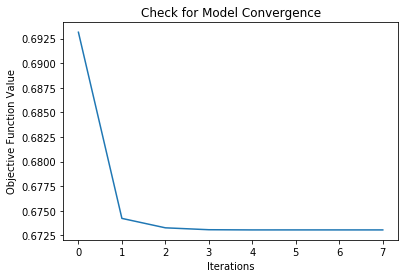

In [4]:
# Plot results
plt.plot(objs)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Check for Model Convergence')
plt.show();

As shown in the plot above, the solution for this method approaches the minimum and reaches the stopping criteria after less than 10 iterations.

## One-vs-One Multi-Class Classification

After ensuring that the model converges on this simulated dataset, I implement the full multi-class classification problem by using a one-vs-one classification strategy. This method trains a model for every pair of classes and makes a prediction based on that model; the final predicted class is then chosen to be the most common class predicted by the one-vs-one models.

I initialize my one-vs-one function by inputting the training data, the test predictors, the initial stepsize for backtracking line search ('t_init'), the stopping criteria ('epsilon'), and the number of classes in the dataset ('classes'). My function also implements 3-fold cross-validation to find the optimal value of the regularization parameter for each one-vs-one model. The parameter 'lamdas' is the list of regularization parameters to test.

The output of my model is the predicted classes for the test set, which I then use to calculate the misclassification error as the final indicator of model performance.

In [5]:
# Define values of the regularization parameter to test during cross-validation
lamdas = np.logspace(-5, 5, num = 20)

# Train one-vs-one models and return predictions
y_predicted = lr.ovo(x_train, y_train, x_test, lamdas, t_init=1, epsilon=0.001, classes=3)

# Print results
print('Misclassification error on test set: {:.1f}%'.format((1-np.mean(y_predicted==y_test))*100))

Misclassification error on test set: 10.0%


The model performed very well on this dataset, giving an accuracy of 90.0% on the test set. For another evaluation metric, I include the confusion matrix:

In [6]:
# Compute confusion matrix using scikit-learn's built in metrics module
metrics.confusion_matrix(y_test, y_predicted)

array([[71,  1, 14],
       [ 0, 88,  1],
       [ 5,  4, 66]], dtype=int64)

In the above matrix, the rows represent the actual classes while the columns represent the predicted classes (therefore the diagonals are correct predictions). It appears that the most common mistakes on this dataset were labelling zeros as twos, and labelling twos as zeros or ones.